In [63]:
import sys
sys.path.append("../") 

import src.carpricer.dataprep as dataprep
from src.carpricer.dataprep import transformations
from src.carpricer.train import evaluator, trainer


In [64]:
!cat ../src/carpricer/carpricer.params.yml

model:
  baseline: 
    objective: reg:squarederror
    min_child_weight: 4
    colsample_bytree: .7
    n_estimators: 200
  tune:
    cv: 5
    objective: neg_mean_squared_error
    search:
      learning_rate: [.003, .05, .07,]
      max_depth: [3, 20]
      alpha: [0, .5]
      subsample: [.7, 1]
data:
  label: lnprice
  test_size: 0.3

In [65]:
train_path = "../data/sample/automobile_prepared.csv"
params_file = "../src/carpricer/carpricer.params.yml"

In [66]:
from jobtools.arguments import ParamsNamespace

In [67]:
params = ParamsNamespace.load(params_file)

In [68]:
X_train, y_train, X_test, y_test = dataprep.read_and_split(train_path, 
                                                           params.data.test_size, 
                                                           params.data.label)

In [69]:
X_train_transformed, transforms = transformations.scale_and_encode(X_train)

In [70]:
X_test_transformed = transforms.transform(X_test)

In [71]:
import mlflow

In [72]:
if mlflow.active_run == 0:
    mlflow.start_run()

In [73]:
params.model.baseline

namespace(objective='reg:squarederror',
          min_child_weight=4,
          colsample_bytree=0.7,
          n_estimators=200)

In [74]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.3.1
Uninstalling scikit-learn-1.3.1:
  Successfully uninstalled scikit-learn-1.3.1
  Using cached scikit_learn-1.3.1-cp310-cp310-macosx_12_0_arm64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.1-cp310-cp310-macosx_12_0_arm64.whl (9.5 MB)


In [75]:
from xgboost.sklearn import XGBRegressor

base_model = XGBRegressor(silent=True, nthread=4, **params.model.baseline.to_dict())

In [76]:
mlflow.log_params(params.model.baseline.to_dict()) 

In [79]:
search = trainer.fit_and_optimize(X_train_transformed, 
                                  y_train.to_numpy(), 
                                  base_model=base_model,
                                  param_grid=params.model.tune.search.to_dict(),
                                  cv=params.model.tune.cv,
                                  scoring_fit=params.model.tune.objective)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:12:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:12:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:12:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:12:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/a/.pyenv/

[CV] END alpha=0, learning_rate=0.003, max_depth=3, subsample=0.7; total time=   0.0s
[CV] END alpha=0, learning_rate=0.003, max_depth=3, subsample=0.7; total time=   0.0s
[CV] END alpha=0, learning_rate=0.003, max_depth=3, subsample=1; total time=   0.0s
[CV] END alpha=0, learning_rate=0.003, max_depth=3, subsample=1; total time=   0.0s
[CV] END alpha=0, learning_rate=0.003, max_depth=3, subsample=0.7; total time=   0.0s
[CV] END alpha=0, learning_rate=0.003, max_depth=3, subsample=0.7; total time=   0.0s
[CV] END alpha=0, learning_rate=0.003, max_depth=3, subsample=0.7; total time=   0.0s
[CV] END alpha=0, learning_rate=0.003, max_depth=3, subsample=1; total time=   0.0s
[CV] END alpha=0, learning_rate=0.003, max_depth=3, subsample=1; total time=   0.0s
[CV] END alpha=0, learning_rate=0.003, max_depth=3, subsample=1; total time=   0.0s
[CV] END alpha=0, learning_rate=0.003, max_depth=20, subsample=0.7; total time=   0.0s
[CV] END alpha=0, learning_rate=0.003, max_depth=20, subsample=

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:12:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:12:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:12:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:12:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/a/.pyenv/

[CV] END alpha=0, learning_rate=0.05, max_depth=20, subsample=1; total time=   0.1s
[CV] END alpha=0, learning_rate=0.07, max_depth=3, subsample=0.7; total time=   0.0s
[CV] END alpha=0, learning_rate=0.07, max_depth=3, subsample=0.7; total time=   0.0s
[CV] END alpha=0, learning_rate=0.05, max_depth=20, subsample=1; total time=   0.1s
[CV] END alpha=0, learning_rate=0.05, max_depth=20, subsample=1; total time=   0.1s
[CV] END alpha=0, learning_rate=0.05, max_depth=20, subsample=1; total time=   0.1s
[CV] END alpha=0, learning_rate=0.07, max_depth=3, subsample=0.7; total time=   0.0s
[CV] END alpha=0, learning_rate=0.07, max_depth=3, subsample=0.7; total time=   0.1s
[CV] END alpha=0, learning_rate=0.07, max_depth=3, subsample=1; total time=   0.1s
[CV] END alpha=0, learning_rate=0.07, max_depth=3, subsample=1; total time=   0.1s
[CV] END alpha=0, learning_rate=0.07, max_depth=3, subsample=0.7; total time=   0.1s
[CV] END alpha=0, learning_rate=0.07, max_depth=3, subsample=1; total tim

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:12:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:12:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:12:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:12:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/a/.pyenv/

[CV] END alpha=0.5, learning_rate=0.003, max_depth=20, subsample=0.7; total time=   0.1s
[CV] END alpha=0.5, learning_rate=0.003, max_depth=20, subsample=1; total time=   0.0s
[CV] END alpha=0.5, learning_rate=0.003, max_depth=20, subsample=0.7; total time=   0.0s
[CV] END alpha=0.5, learning_rate=0.003, max_depth=20, subsample=1; total time=   0.0s
[CV] END alpha=0.5, learning_rate=0.003, max_depth=3, subsample=1; total time=   0.1s
[CV] END alpha=0.5, learning_rate=0.003, max_depth=20, subsample=0.7; total time=   0.0s
[CV] END alpha=0, learning_rate=0.07, max_depth=20, subsample=1; total time=   0.1s
[CV] END alpha=0, learning_rate=0.07, max_depth=20, subsample=1; total time=   0.1s
[CV] END alpha=0.5, learning_rate=0.003, max_depth=20, subsample=0.7; total time=   0.0s
[CV] END alpha=0.5, learning_rate=0.003, max_depth=20, subsample=1; total time=   0.0s
[CV] END alpha=0.5, learning_rate=0.003, max_depth=20, subsample=1; total time=   0.0s
[CV] END alpha=0.5, learning_rate=0.003, m

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:12:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:12:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:12:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:12:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/a/.pyenv/

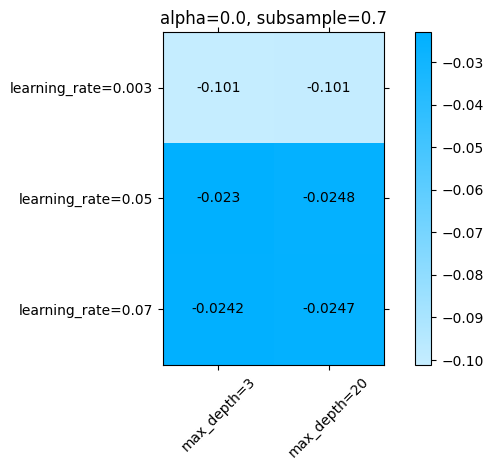

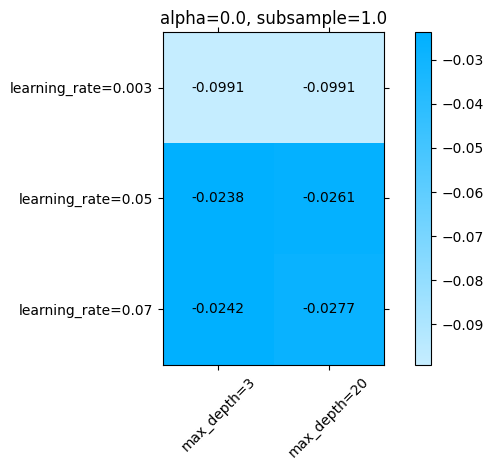

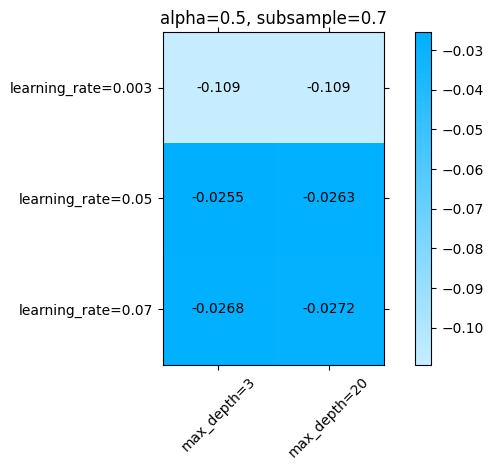

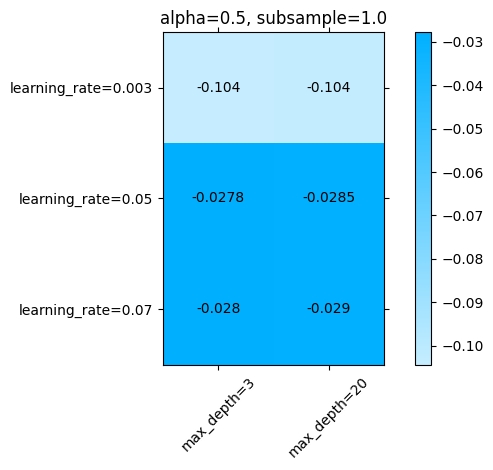

In [80]:
evaluator.evaluate_search(search, plot_params_name=['learning_rate', 'max_depth'], to_mlflow=False)

In [81]:
best_model = search.best_estimator_
best_params = search.best_params_

In [82]:
best_params

{'alpha': 0, 'learning_rate': 0.05, 'max_depth': 3, 'subsample': 0.7}

In [83]:
mlflow.log_params(best_params)

In [84]:
metrics = evaluator.evaluate_regressor(best_model, X_test_transformed, y_test)

In [85]:
mlflow.log_metrics(metrics)

In [86]:
from sklearn.pipeline import Pipeline

In [87]:
model_pipeline = Pipeline(steps=[('preprocessing', transforms),
                                 ('model', best_model)])

In [61]:
# if os.path.isdir(data_path):
#     data_path = os.path.join(data_path, "*.csv")

# if not str(data_path).endswith('.csv'):
#     raise TypeError('Only CSV files are supported by the loading data procedure.')

# if not glob.glob(data_path):
#     raise FileNotFoundError(f"Path or directory {data_path} doesn't exists")

# df = dp.concat(map(dp.read_csv, glob.glob(data_path))).dropna()
# train, test = train_test_split(df, test_size=test_size)

# X_train = train.drop([label], axis=1)
# y_train = train[label].to_frame([label])

# X_test = test.drop([label], axis=1)
# y_test = test[label].to_frame([label])

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [89]:
model_pipeline.fit(X_train, y_train.to_numpy())

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:13:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_inputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['wheel-base', 'length',
                                                   'width', 'height',
                                                   'curb-weight', 'engine-size',
                                                   'bore', 'stroke',
                                                   'compression-ratio',
                                                   'horsepower', 'peak-rpm',
                                                   'city-mpg', 'highway-mpg']),
                                                 ('cat_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)...
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None, min_child_weight=4,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=200,
                              n_jobs=None, nthread=4, ...))])

In [90]:
from mlflow.models.signature import infer_signature

In [91]:
signature = infer_signature(X_test, y_test.values)

In [92]:
mlflow.sklearn.log_model(model_pipeline, "model", signature=signature)

In [93]:
mlflow.end_run()